# Module 1 Howework 3 Meet the Data. Returns and Return Forecasts

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf

%matplotlib inline

plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (9,5)

In [2]:
df = pd.read_csv('./data/assetpricing-data-ps1.csv', index_col=0, parse_dates=True)
df.loc[:,['Return', 'T-bill ret']] = df.loc[:,['Return', 'T-bill ret']]
df.head()

,Return,DP,D growth,T-bill ret
Date,,,,
1926-12-31,0.096903,0.052653,NaN,0.036026
1927-12-31,0.334281,0.048550,0.173350,0.030917
1928-12-31,0.390488,0.040246,0.108052,0.044427
1929-12-31,-0.150244,0.038257,-0.222002,0.049219
1930-12-31,-0.288163,0.048014,-0.147548,0.027487


In [3]:
df['excess'] = df['Return'] - df['T-bill ret']

In [4]:
(df.loc[:,['Return', 'T-bill ret', 'excess']].mean() * 100).round(1)

Return        11.6
T-bill ret     4.0
excess         7.6
dtype: float64

In [5]:
(df.loc[:,['Return', 'T-bill ret', 'excess']].std() * 100).round(1)

Return        20.3
T-bill ret     3.4
excess        20.6
dtype: float64

In [6]:
print(f"Sharpe Ratio: {df['excess'].mean() / df['excess'].std():.4f}")

Sharpe Ratio: 0.3704


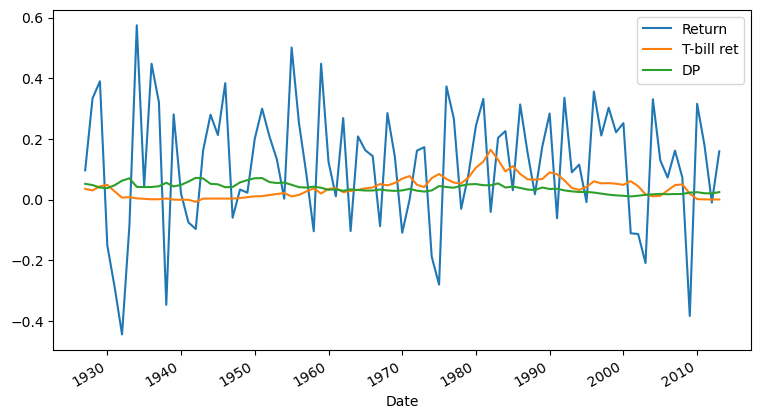

In [7]:
df[['Return', 'T-bill ret', 'DP']].plot()
pass

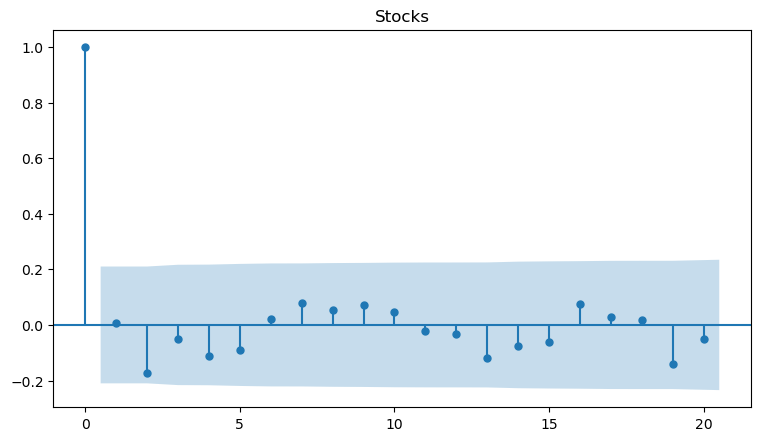

In [8]:
plot_acf(df['Return'], title='Stocks')
pass

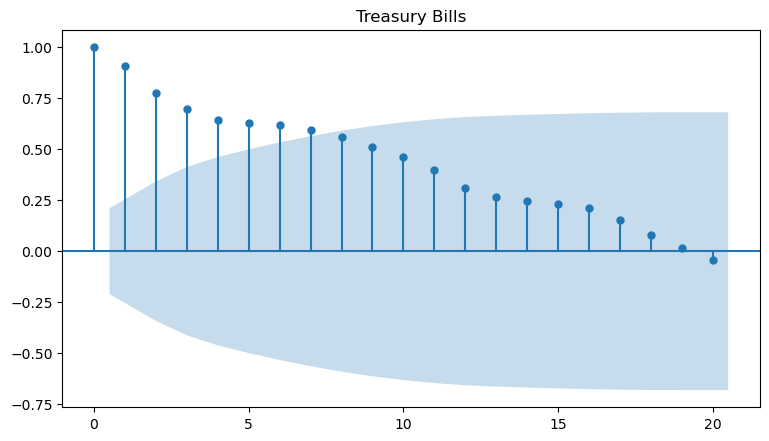

In [9]:
plot_acf(df['T-bill ret'], title='Treasury Bills')
pass

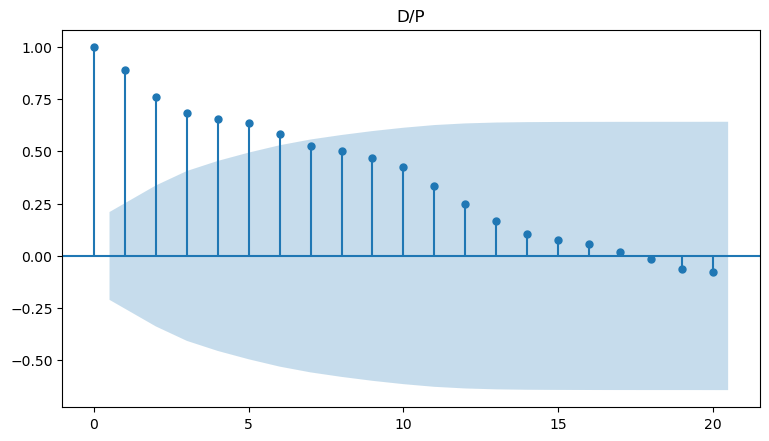

In [10]:
plot_acf(df['DP'], title='D/P')
pass

In [11]:
df_data = pd.concat([df['Return'], df['Return'].shift(1)], keys=['R', 'R_L1'], axis=1).dropna()
X = sm.add_constant(df_data['R_L1'])
y = df_data['R']

fit_lm = sm.OLS(y, X).fit()

print(f'R2 = {fit_lm.rsquared:.2f}')
print(f'E[R] = {100*y.mean():.2f}')
print(f'std(E[R]) = {100*fit_lm.predict(X).std():.2f}')
print(fit_lm.summary())

R2 = 0.00
E[R] = 11.62
std(E[R]) = 0.13
                            OLS Regression Results                            
Dep. Variable:                      R   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                  0.003409
Date:                Wed, 27 Jan 2021   Prob (F-statistic):              0.954
Time:                        15:17:27   Log-Likelihood:                 15.054
No. Observations:                  86   AIC:                            -26.11
Df Residuals:                      84   BIC:                            -21.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [12]:
df_data = pd.concat([df['T-bill ret'], df['T-bill ret'].shift(1)], keys=['TB', 'TB_L1'], axis=1).dropna()
X = sm.add_constant(df_data['TB_L1'])
y = df_data['TB']

fit_lm = sm.OLS(y, X).fit()

print(f'R2 = {fit_lm.rsquared:.2f}')
print(f'E[TB] = {100*y.mean():.2f}')
print(f'std(E[TB]) = {100*fit_lm.predict(X).std():.2f}')
print(fit_lm.summary())

R2 = 0.83
E[TB] = 3.95
std(E[TB]) = 3.16
                            OLS Regression Results                            
Dep. Variable:                     TB   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     416.9
Date:                Wed, 27 Jan 2021   Prob (F-statistic):           2.55e-34
Time:                        15:17:27   Log-Likelihood:                 244.57
No. Observations:                  86   AIC:                            -485.1
Df Residuals:                      84   BIC:                            -480.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

In [13]:
df_data = pd.concat([df['excess'], df['excess'].shift(1)], keys=['E', 'E_L1'], axis=1).dropna()
X = sm.add_constant(df_data['E_L1'])
y = df_data['E']

fit_lm = sm.OLS(y, X).fit()

print(f'R2 = {fit_lm.rsquared:.2f}')
print(f'E[E] = {100*y.mean():.2f}')
print(f'std(E[E]) = {100*fit_lm.predict(X).std():.2f}')
print(fit_lm.summary())

R2 = 0.00
E[E] = 7.66
std(E[E]) = 0.25
                            OLS Regression Results                            
Dep. Variable:                      E   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                   0.01221
Date:                Wed, 27 Jan 2021   Prob (F-statistic):              0.912
Time:                        15:17:27   Log-Likelihood:                 13.712
No. Observations:                  86   AIC:                            -23.42
Df Residuals:                      84   BIC:                            -18.52
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        

In [14]:
df_data = pd.concat([df['excess'], df['DP'].shift(1)], axis=1).dropna()
X = sm.add_constant(df_data['DP'])
y = df_data['excess']

fit_lm = sm.OLS(y, X).fit()

print(f'R2 = {fit_lm.rsquared:.2f}')
print(f'E[R] = {100*y.mean():.2f}')
print(f'std(E[R]) = {100*fit_lm.predict(X).std():.2f}')
print(fit_lm.summary())

R2 = 0.07
E[R] = 7.66
std(E[R]) = 5.54
                            OLS Regression Results                            
Dep. Variable:                 excess   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     6.449
Date:                Wed, 27 Jan 2021   Prob (F-statistic):             0.0129
Time:                        15:17:27   Log-Likelihood:                 16.886
No. Observations:                  86   AIC:                            -29.77
Df Residuals:                      84   BIC:                            -24.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        

In [15]:
df_data = pd.concat([
    (1+df[['Return', 'T-bill ret']]).rolling(5).agg(lambda x : x.prod()).shift(-5),
    df['DP']
], axis=1).dropna()
df_data['excess'] = df_data['Return'] - df_data['T-bill ret']

print(df_data.head(), '\n')

X = sm.add_constant(df_data['DP'])
y = df_data['excess']

fit_lm = sm.OLS(y, X).fit()

print(f'R2 = {fit_lm.rsquared:.2f}')
print(f'E[R] = {y.mean():.2f}')
print(f'std(E[R]) = {fit_lm.predict(X).std():.2f}', '\n')
print(fit_lm.summary())

              Return  T-bill ret        DP    excess
Date                                                
1926-12-31  0.624449    1.168972  0.052653 -0.544523
1927-12-31  0.428349    1.143794  0.048550 -0.715446
1928-12-31  0.485199    1.100238  0.040246 -0.615039
1929-12-31  0.595365    1.052087  0.038257 -0.456722
1930-12-31  1.211389    1.025600  0.048014  0.185789 

R2 = 0.24
E[R] = 0.45
std(E[R]) = 0.28 

                            OLS Regression Results                            
Dep. Variable:                 excess   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     24.94
Date:                Wed, 27 Jan 2021   Prob (F-statistic):           3.41e-06
Time:                        15:17:27   Log-Likelihood:                -60.629
No. Observations:                  82   AIC:                             125.3
Df Residuals:                    

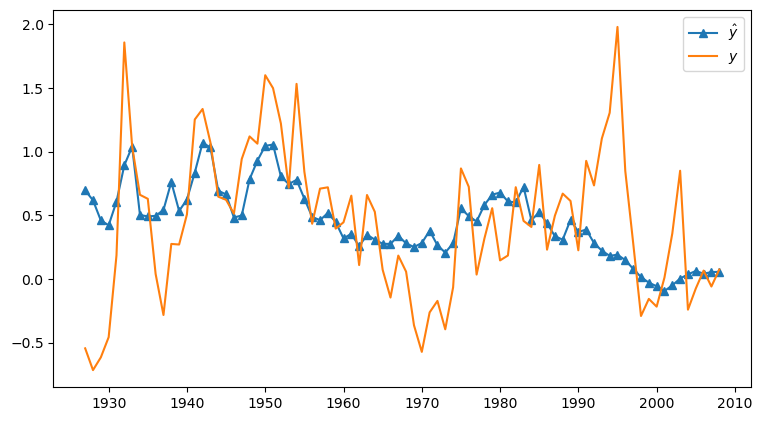

In [16]:
yhat = fit_lm.predict(X)

plt.plot(yhat, label='$\hat{y}$', marker='^')
plt.plot(y, label='$y$')
plt.legend()
pass

In [17]:
df_data = pd.concat([
    (1+df[['Return', 'T-bill ret']]).rolling(5).agg(lambda x : x.prod()).shift(-5),
    df['DP']
], axis=1).dropna().iloc[::5]
df_data['excess'] = df_data['Return'] - df_data['T-bill ret']

print(df_data.head(), '\n')

X = sm.add_constant(df_data['DP'])
y = df_data['excess']

fit_lm = sm.OLS(y, X).fit()

print(f'R2 = {fit_lm.rsquared:.4f}')
print(f'E[R] = {y.mean():.2f}')
print(f'std(E[R]) = {fit_lm.predict(X).std():.2f}', '\n')
print(fit_lm.summary())

              Return  T-bill ret        DP    excess
Date                                                
1926-12-31  0.624449    1.168972  0.052653 -0.544523
1931-12-31  2.877076    1.020294  0.063001  1.856782
1936-12-31  0.715763    0.998401  0.044583 -0.282638
1941-12-31  2.354484    1.019979  0.072311  1.334505
1946-12-31  1.996185    1.054513  0.042298  0.941671 

R2 = 0.2969
E[R] = 0.47
std(E[R]) = 0.34 

                            OLS Regression Results                            
Dep. Variable:                 excess   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     6.335
Date:                Wed, 27 Jan 2021   Prob (F-statistic):             0.0237
Time:                        15:17:27   Log-Likelihood:                -12.802
No. Observations:                  17   AIC:                             29.60
Df Residuals:                  

S:\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
